In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
Data = pd.read_csv("Hotel_Reviews.csv")

In [3]:
Data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
Data["Review"] = Data["Negative_Review"] + Data["Positive_Review"]

In [6]:
Data.shape

(515738, 18)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [13]:
Data.Tags .head()

0    [' Leisure trip ', ' Couple ', ' Duplex Double...
1    [' Leisure trip ', ' Couple ', ' Duplex Double...
2    [' Leisure trip ', ' Family with young childre...
3    [' Leisure trip ', ' Solo traveler ', ' Duplex...
4    [' Leisure trip ', ' Couple ', ' Suite ', ' St...
Name: Tags, dtype: object

In [15]:
Data.Review.head()

0     I am so angry that i made this post available...
1    No Negative No real complaints the hotel was g...
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: Review, dtype: object

In [16]:
! pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/626.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00


In [17]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

In [18]:
Data['Review'] = Data['Review'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [19]:
Data['Review'] = Data['Review'].str.replace('[^\w\s]', "")
Data.Review.head(5)

0    i am so angry that i made this post available ...
1    no negative no real complaints the hotel was g...
2    rooms are nice but for elderly a bit difficult...
3    my room was dirty and i was afraid to walk bar...
4    you when i booked with your company on line yo...
Name: Review, dtype: object

In [21]:
stop = stopwords.words('english')
Data['Review'] = Data['Review'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
Data.Review.head()

0    angry made post available via possible sites u...
1    negative real complaints hotel great great loc...
2    rooms nice elderly bit difficult rooms two sto...
3    room dirty afraid walk barefoot floor looked c...
4    booked company line showed pictures room thoug...
Name: Review, dtype: object

In [22]:
Data['Review'] = Data['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Data.Review.head()

0    angry made post available via possible site us...
1    negative real complaint hotel great great loca...
2    room nice elderly bit difficult room two story...
3    room dirty afraid walk barefoot floor looked c...
4    booked company line showed picture room though...
Name: Review, dtype: object

In [26]:
! pip install wordcloud

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [31]:
!pip install seaborn

In [24]:
Data.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Review'],
      dtype='object')

In [32]:
import seaborn as sns

In [29]:
Data.Reviewer_Score.value_counts()

Reviewer_Score
10.0    115853
9.6      71167
9.2      58583
8.8      46429
8.3      41128
7.5      34878
7.9      33097
7.1      24855
6.7      18793
6.3      14924
5.8      12034
5.4       9526
5.0       8422
4.6       6240
4.2       5095
3.8       4044
3.3       2772
2.5       2199
2.9       1589
9.5        724
9.0        647
8.5        508
8.0        505
7.0        411
6.5        345
6.0        253
5.5        227
4.5        122
4.0         84
3.5         79
9.4         63
8.1         39
3.0         37
6.9         29
5.6         17
4.4         12
3.1          8
Name: count, dtype: int64

<Axes: xlabel='Reviewer_Score', ylabel='count'>

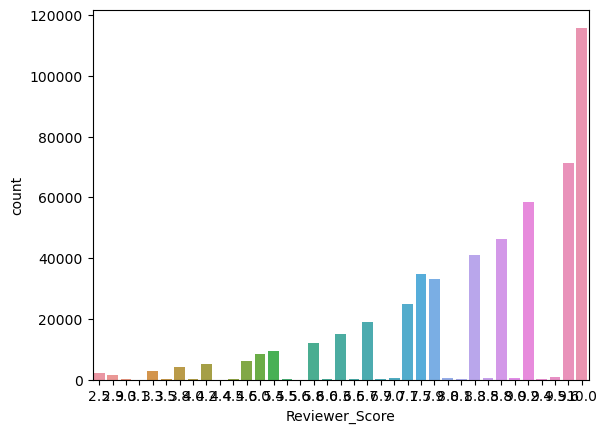

In [33]:
sns.countplot(data = Data, x = 'Reviewer_Score')

In [34]:

reviews = Data

reviews.dropna(inplace=True)

In [37]:
score_1 = reviews[reviews['Reviewer_Score'] <= 2]
score_2 = reviews[reviews['Reviewer_Score'] <= 4]
score_3 = reviews[reviews['Reviewer_Score'] <= 6]
score_4 = reviews[reviews['Reviewer_Score'] <=8]
score_5 = reviews[reviews['Reviewer_Score'] <= 10]

In [38]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

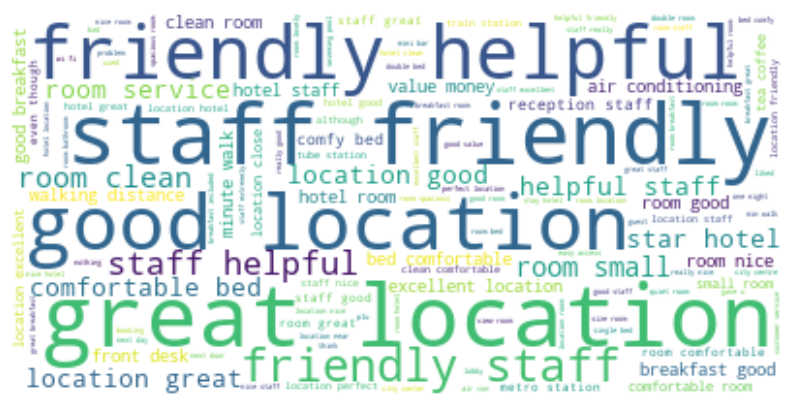

In [40]:
reviews_str = reviews_sample.Review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------------- ----------------------- 51.2/126.0 kB 525.1 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [53]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [55]:

emptyline=[]
for row in Data['Review']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

Data_sentiments=pd.DataFrame(emptyline)
Data_sentiments.head()

,neg,neu,pos,compound
0,0.129,0.774,0.097,-0.7096
1,0.112,0.611,0.277,0.9460
2,0.098,0.591,0.311,0.8555
3,0.189,0.584,0.226,0.7184
4,0.032,0.760,0.209,0.9153


In [56]:
df_c = pd.concat([Data.reset_index(drop=True), Data_sentiments], axis=1)
df_c.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Reviewer_Score,Tags,days_since_review,lat,lng,Review,neg,neu,pos,compound
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,angry made post available via possible site us...,0.129,0.774,0.097,-0.7096
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,negative real complaint hotel great great loca...,0.112,0.611,0.277,0.9460
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,room nice elderly bit difficult room two story...,0.098,0.591,0.311,0.8555


In [57]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Tags,days_since_review,lat,lng,Review,neg,neu,pos,compound,Sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,angry made post available via possible site us...,0.129,0.774,0.097,-0.7096,Negative
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,negative real complaint hotel great great loca...,0.112,0.611,0.277,0.9460,Positive
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,room nice elderly bit difficult room two story...,0.098,0.591,0.311,0.8555,Positive
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,room dirty afraid walk barefoot floor looked c...,0.189,0.584,0.226,0.7184,Positive
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,booked company line showed picture room though...,0.032,0.760,0.209,0.9153,Positive


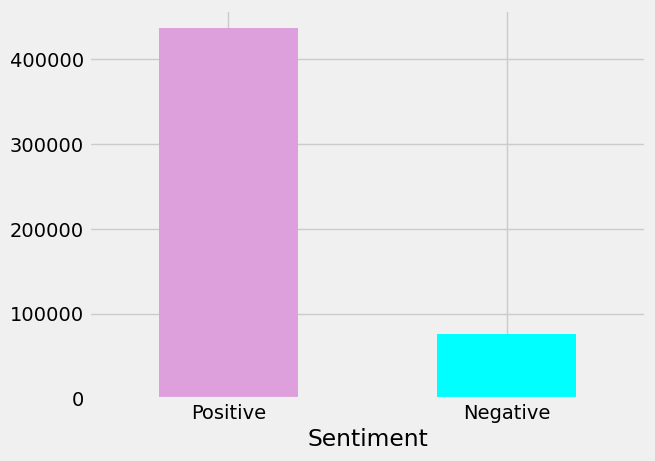

In [58]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);